In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## Data Preparation

In [19]:
# Read CSV in Pandas
file_path = Path('myopia.csv')
myopia = pd.read_csv(file_path)
df_myopia = pd.read_csv(file_path).drop('MYOPIC', axis=1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [20]:
# Confirm data types are numeric
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [21]:
# Check data for null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [22]:
# Check data for duplicate information
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [23]:
# Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR']])

In [24]:
# Create a DataFrame with transformed data
new_myopia = pd.DataFrame(scaled_data, columns = df_myopia.columns[:12])
new_myopia[['MOMMY', 'DADMY']] = df_myopia[['MOMMY', 'DADMY']]
new_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


## Dimensionality Reduction

In [25]:
# Initialize PCA Model
pca = PCA(n_components=0.90)

# Get principal components for the data
myopia_pca = pca.fit_transform(new_myopia)

In [26]:
# Transform PCA data to DataFrame
df_myopia_pca = pd.DataFrame(data = myopia_pca, columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6',\
                                                          'pc_7', 'pc_8', 'pc_9'])
df_myopia_pca.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9
0,0.509064,1.240002,0.756795,-3.399057,-1.372825,-2.062353,-1.846270,0.142164,-1.354360
1,-0.659781,-1.479657,-0.443546,0.728013,-0.210619,0.132010,-0.434612,-0.627053,-0.354412
2,-0.905146,-0.816177,0.736691,-0.161225,0.903472,-0.048094,0.187300,0.075242,-0.172101
3,0.117579,1.143982,-0.978658,-1.216472,-2.095468,-1.900045,-0.315069,-0.541609,0.693329
4,-0.406560,-2.788647,0.560417,-0.462657,-0.278111,-0.882195,0.701336,0.528334,0.107169


In [27]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.23709653, 0.17470773, 0.09439418, 0.08260749, 0.07899141,
       0.07203043, 0.07101828, 0.05837071, 0.0488404 ])

In [28]:
# Create label based off whether or not child has myopia
labels = myopia['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [30]:
# Run tsne
tsne = TSNE(learning_rate = 500)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that dimentions are reduced to 2
tsne_features.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

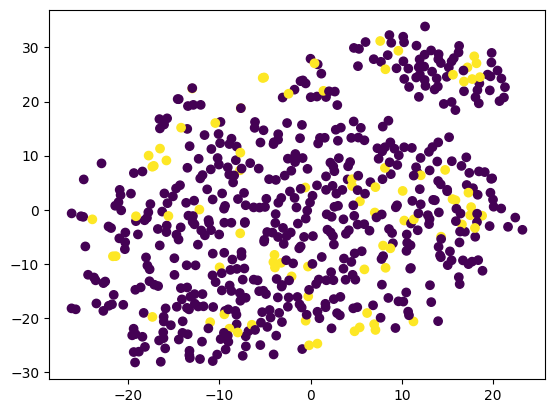

In [31]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [32]:
# Run tsne
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that dimensions have been reduced to 2
tsne_features.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

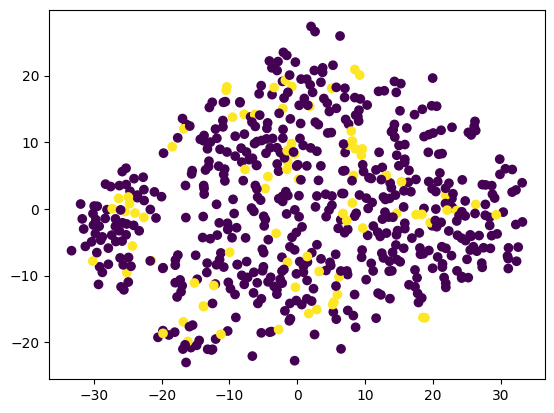

In [33]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [38]:
# Run tsne
tsne = TSNE(learning_rate = 100)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that dimensions have been reduced to 2
tsne_features.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

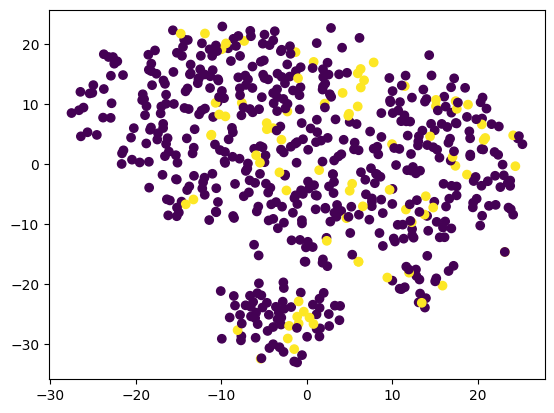

In [39]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [35]:
# Run tsne
tsne = TSNE(learning_rate = 50)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that dimensions have been reduced to 2
tsne_features.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

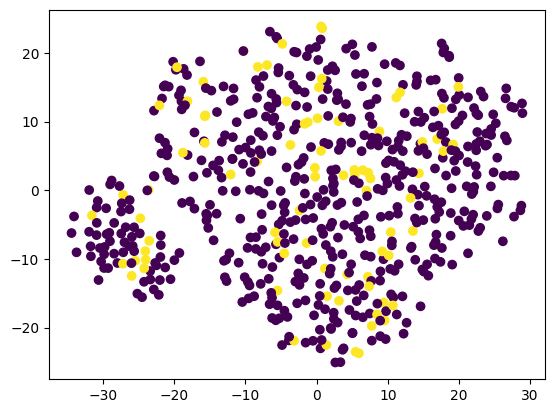

In [37]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

## Clustering

In [44]:
inertia = []
k =list(range(1,11))

# Calculate inertia for range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(new_myopia)
    inertia.append(km.inertia_)
    
# Create elbow curve using hvplot
elbow_data = {'k':k, "inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7724.972492
1,2,6571.031691
2,3,5805.263056
3,4,5438.021728
4,5,5168.415685


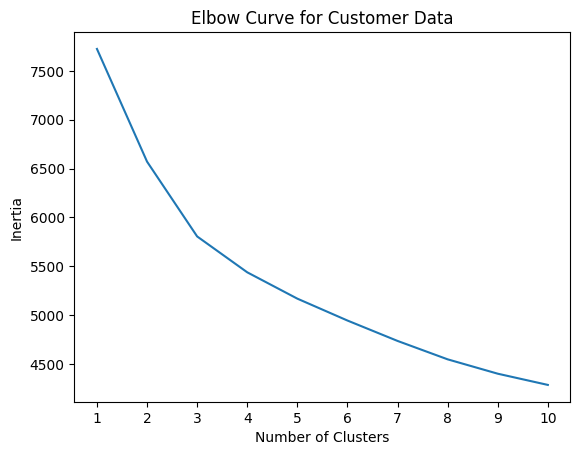

In [45]:
# Plot the elbow curve to find the best candidate for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Customer Data')
plt.show()

In [49]:
# Inititalize kmeans model
def get_clusters(k, data):
    model = KMeans(n_clusters = k, random_state=0)
    
    # Train the model
    model.fit(data)
    
    # Predict Clusters
    prediction = model.predict(data)
    
    # Create DataFrame with prediction clusters
    data["CLASS"] = model.labels_
    
    return data

In [50]:
clusters = get_clusters(3, new_myopia)
clusters.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,CLASS
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1,0
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1,0
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0,1


In [52]:
def show_clusters(df):
    plt.scatter(df['STUDYHR'], df['VCD'], c=df['CLASS'])
    plt.xlabel('STUDYHR')
    plt.ylabel('VCD')
    plt.show()

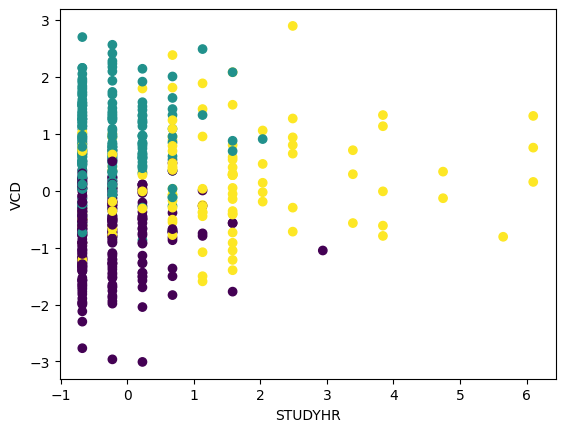

In [53]:
show_clusters(clusters)

In [54]:
def show_clusters(df):
    plt.scatter(df['AL'], df['TVHR'], c=df['CLASS'])
    plt.xlabel('AL')
    plt.ylabel('TVHR')
    plt.show()

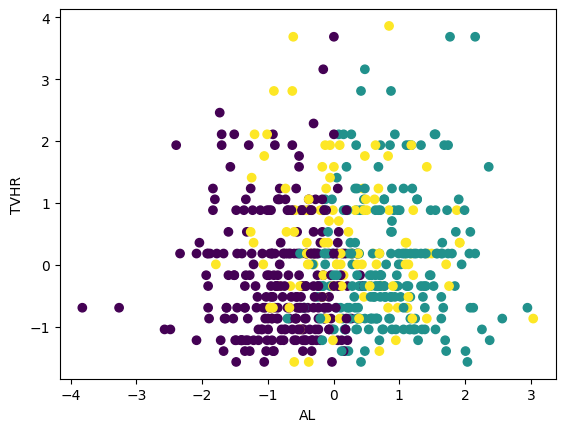

In [55]:
show_clusters(clusters)

In [58]:
def show_clusters(df):
    plt.scatter(df['SPORTHR'], df['ACD'], c=df['CLASS'])
    plt.xlabel('SPORTHR')
    plt.ylabel('ACD')
    plt.show()

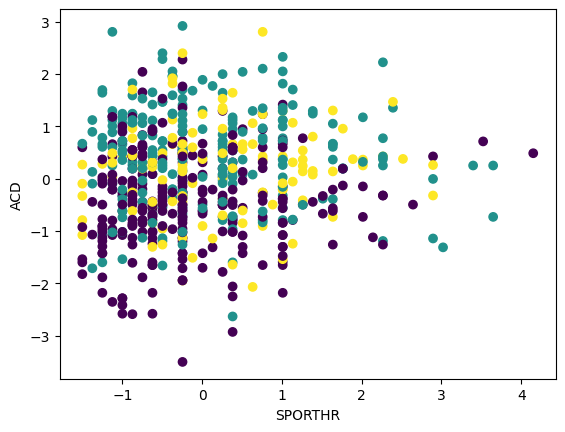

In [59]:
show_clusters(clusters)

In [60]:
def show_clusters(df):
    plt.scatter(df['DIOPTERHR'], df['SPHEQ'], c=df['CLASS'])
    plt.xlabel('DIOPTERHR')
    plt.ylabel('SPHEQ')
    plt.show()

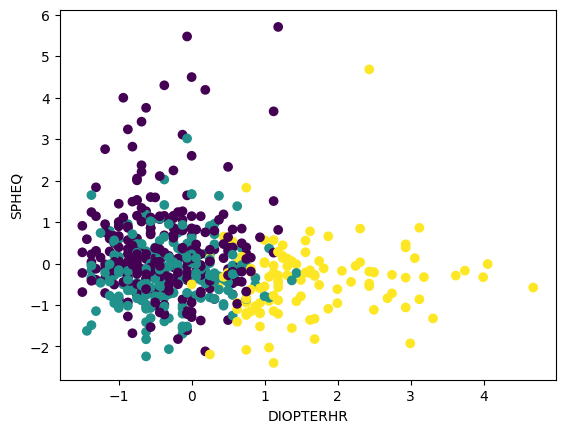

In [61]:
show_clusters(clusters)

## Analysis

According to the elbow curve above, the optimal number of clusters is 3. After running the t-SNE algorithm, the data does not appear to be split into clusters. 